------
# Análise exploratória e preparação dos dados

- Felipe Siqueira e Mariana Martins
-------

## Dataset

[Link para o dataset](https://www.pns.icict.fiocruz.br/painel-de-indicadores-mobile-desktop/)

Módulos disponiveis no dataset:

- Doenças Crônicas (Q-2019) 
- Estilo de Vida/Alimentação (P-2019)
- Estilo de Vida/Prática de Atividade Física (P-2019)
- Antropometria (W-2019)
- Utilização de Serviços de Saúde (J-2019)
- Percepção do Estado de Saúde (N-2019)
- Cobertura de Plano de Saúde (I-2019)
- Estilo de Vida/Consumo de Álcool (P-2019) <br>
- Acidentes (O-2019) <br>
- Violências (V-2019) <br>
- Estilo de vida / Consumo de álcool (P-2019) <br>
- Estilo de vida / Tabagismo (P-2019) <br>
- Saúde Bucal (U-2019) <br>
- Saúde da mulher (R-2019) <br>
- Saúde dos idosos (K-2019) <br>
- Deficiências (G-2019) <br>
- Saúde da mulher / pré-natal (S-2019) <br>
- Saúde da mulher / assistência ao parto (S-2019) <br>

## Conhecendo o Dataset

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregando o dataset 
df = pd.read_csv('pns2019.csv')

# Exibir todas as colunas do dataset
print(df.columns)

Index(['V0001', 'V0024', 'UPA_PNS', 'V0006_PNS', 'V0015', 'V0020', 'V0022',
       'V0026', 'V0031', 'V0025A',
       ...
       'VDE002', 'VDE014', 'VDF002', 'VDF003', 'VDF004', 'VDL001', 'VDM001',
       'VDP001', 'VDR001', 'VDDATA'],
      dtype='object', length=1087)


In [3]:
# Exibir as primeiras 5 linhas do dataset
print(df.head())

   V0001    V0024    UPA_PNS  V0006_PNS  V0015  V0020  V0022  V0026  V0031  \
0     11  1110011  110000016          1      1   2019    6.0      1      1   
1     11  1110011  110000016          1      1   2019    6.0      1      1   
2     11  1110011  110000016          1      1   2019    6.0      1      1   
3     11  1110011  110000016          1      1   2019    6.0      1      1   
4     11  1110011  110000016          1      1   2019    6.0      1      1   

   V0025A  ...  VDE002  VDE014  VDF002  VDF003  VDF004  VDL001  VDM001  \
0     1.0  ...     1.0     6.0  2098.0   350.0     2.0     NaN     NaN   
1     0.0  ...     NaN     NaN  2098.0   350.0     2.0     NaN     NaN   
2     0.0  ...     1.0     4.0  2098.0   350.0     2.0     NaN     NaN   
3     9.0  ...     NaN     NaN  2098.0   350.0     2.0     NaN     NaN   
4     9.0  ...     NaN     NaN  2098.0   350.0     2.0     NaN     NaN   

   VDP001  VDR001    VDDATA  
0     NaN     NaN  20210825  
1     NaN     NaN  2021082

In [4]:
# Exibir informações gerais sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293726 entries, 0 to 293725
Columns: 1087 entries, V0001 to VDDATA
dtypes: float64(1078), int64(9)
memory usage: 2.4 GB


In [5]:
# Visualizando todas as colunas do dataset
print(df.columns.tolist())

['V0001', 'V0024', 'UPA_PNS', 'V0006_PNS', 'V0015', 'V0020', 'V0022', 'V0026', 'V0031', 'V0025A', 'V0025B', 'A001', 'A002010', 'A003010', 'A004010', 'A01001', 'A011', 'A005010', 'A005012', 'A00601', 'A009010', 'A01401', 'A01402', 'A01403', 'A01501', 'A016010', 'A018011', 'A018012', 'A018013', 'A018014', 'A018015', 'A018016', 'A018017', 'A018018', 'A018019', 'A018020', 'A018021', 'A018022', 'A018023', 'A018024', 'A018025', 'A018026', 'A018027', 'A018028', 'A01901', 'A02101', 'A02102', 'A02201', 'A02305', 'A02306', 'A02307', 'A02308', 'A02401', 'A02402', 'B001', 'B002', 'B003', 'B004', 'C001', 'C00301', 'C004', 'C006', 'C00701', 'C00702', 'C00703', 'C008', 'C009', 'C01001', 'C010010', 'C013', 'C014', 'C015', 'C016', 'C017', 'C018', 'C01801', 'C011', 'C012', 'D001', 'D00201', 'D00202', 'D00301', 'D00501', 'D006', 'D00601', 'D007', 'D008', 'D00901', 'D010', 'D01101', 'D01201', 'D01301', 'D01302', 'D01303', 'D014', 'D015', 'E001', 'E002', 'E003', 'E004', 'E005', 'E006011', 'E008', 'E010010'

## Tratamento de Dados Básico

A partir do [Painel de Indicadores de Saúde – Pesquisa Nacional de Saúde](https://www.pns.icict.fiocruz.br/painel-de-indicadores-mobile-desktop/), conseguimos mapear e identificar o significado de cada coluna nos dados. Com isso, iremos renomeá-las para melhorar a compreensão dos dados.

In [6]:
# Filtrar as colunas desejadas e renomeá-las
colunas_desejadas = {
    'C006': 'Sexo',
    'C008': 'Idade',
    'V0026': 'Situação cens.',
    'M001': 'Entrevista',
    'M00203': 'Aptidão',
    'M00303': 'Dias trabalho',
    'N001': 'Aval. Saúde',
    'N00101': 'Bem estar',
    'N010': 'Frequência Problemas Sono',
    'N011': 'Frequência Indisposição',
    'N012': 'Frequência falta de prazer',
    'N013': 'Frequência falta concentração',
    'N014': 'Frequência problemas alimentação',
    'N015': 'Frequência Lentidão ou Agitação',
    'N016': 'Frequência sem perspectiva',
    'N017': 'Frequência sentimento de fracasso',
    'N018': 'Frequência ideação suicida',
    'P00102': 'Sabe o peso?',
    'P00103': 'Peso - info.',
    'P00104': 'Peso - Final',
    'P00402': 'Sabe a altura?',
    'P00403': 'Altura cm - info',
    'P00404': 'Altura cm - Final',
    'P005': 'Gravida?',
    'P027': 'Frequencia bebida alcoolica',
    'P02801': 'Dias por semana que consome',
    'P034': 'Pratica exercícios físicos?',
    'P035': 'Dias de exercícios',
    'P036': 'Qual exercício mais pratica?',
    'P03701': 'Horas de prática',
    'P03702': 'Minutos de prática',
    'P04502': 'Horas de tela',
    'P050': 'Fuma Tabaco atualmente?',
    'P051': 'Fumou diariamente no passado?',
    'P052': 'Fumou no passado?',
    'P053': 'Idade que começou a fumar diariamente',
    'P05401': 'Média diária ou Semanal de cigarros',
    'Q092': 'Diagnóstico depressão'
}


df_filtrado = df[list(colunas_desejadas.keys())].rename(columns=colunas_desejadas)
df_filtrado.head()

,Sexo,Idade,Situação cens.,Entrevista,Aptidão,Dias trabalho,Aval. Saúde,Bem estar,Frequência Problemas Sono,Frequência Indisposição,...,Qual exercício mais pratica?,Horas de prática,Minutos de prática,Horas de tela,Fuma Tabaco atualmente?,Fumou diariamente no passado?,Fumou no passado?,Idade que começou a fumar diariamente,Média diária ou Semanal de cigarros,Diagnóstico depressão
0,2.0,55.0,1,1.0,1.0,0.0,3.0,3.0,4.0,2.0,...,1.0,0.0,30.0,1.0,3.0,NaN,1.0,15.0,NaN,1.0
1,1.0,69.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,31.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,9.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print(df_filtrado.shape)
df_filtrado.dtypes

(293726, 38)


Sexo                                     float64
Idade                                    float64
Situação cens.                             int64
Entrevista                               float64
Aptidão                                  float64
Dias trabalho                            float64
Aval. Saúde                              float64
Bem estar                                float64
Frequência Problemas Sono                float64
Frequência Indisposição                  float64
Frequência falta de prazer               float64
Frequência falta concentração            float64
Frequência problemas alimentação         float64
Frequência Lentidão ou Agitação          float64
Frequência sem perspectiva               float64
Frequência sentimento de fracasso        float64
Frequência ideação suicida               float64
Sabe o peso?                             float64
Peso - info.                             float64
Peso - Final                             float64
Sabe a altura?      

In [9]:
df_filtrado.describe()

,Sexo,Idade,Situação cens.,Entrevista,Aptidão,Dias trabalho,Aval. Saúde,Bem estar,Frequência Problemas Sono,Frequência Indisposição,...,Qual exercício mais pratica?,Horas de prática,Minutos de prática,Horas de tela,Fuma Tabaco atualmente?,Fumou diariamente no passado?,Fumou no passado?,Idade que começou a fumar diariamente,Média diária ou Semanal de cigarros,Diagnóstico depressão
count,279382.000000,279382.000000,293726.000000,94111.000000,90840.000000,52832.000000,90846.000000,90846.000000,90846.000000,90846.000000,...,35196.000000,35196.000000,35196.000000,90846.000000,90846.000000,1186.000000,79460.000000,32063.000000,11386.000000,90846.000000
mean,1.518788,35.267651,1.236843,1.083019,1.021004,4.271616,2.322634,2.165544,1.665049,1.594335,...,5.730765,1.011251,13.812564,3.771525,2.762389,1.471332,2.427888,16.804260,2.240998,1.908284
std,0.499648,21.675970,0.425146,0.597202,0.196063,2.190128,0.817765,0.753347,1.035698,0.919173,...,4.859552,0.841925,16.870573,1.929889,0.636955,0.499388,0.882790,6.315622,1.748949,0.288626
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,1.000000,17.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,2.000000,3.000000,1.000000,1.000000,13.000000,1.000000,2.000000
50%,2.000000,34.000000,1.000000,1.000000,1.000000,5.000000,2.000000,2.000000,1.000000,1.000000,...,5.000000,1.000000,0.000000,4.000000,3.000000,1.000000,3.000000,16.000000,1.000000,2.000000
75%,2.000000,52.000000,1.000000,1.000000,1.000000,6.000000,3.000000,3.000000,2.000000,2.000000,...,11.000000,1.000000,30.000000,6.000000,3.000000,2.000000,3.000000,18.000000,5.000000,2.000000
max,2.000000,112.000000,2.000000,9.000000,9.000000,8.000000,5.000000,5.000000,4.000000,4.000000,...,17.000000,15.000000,59.000000,6.000000,3.000000,2.000000,3.000000,90.000000,5.000000,2.000000


In [10]:
df_filtrado.isnull().sum()

Sexo                                      14344
Idade                                     14344
Situação cens.                                0
Entrevista                               199615
Aptidão                                  202886
Dias trabalho                            240894
Aval. Saúde                              202880
Bem estar                                202880
Frequência Problemas Sono                202880
Frequência Indisposição                  202880
Frequência falta de prazer               202880
Frequência falta concentração            202880
Frequência problemas alimentação         202880
Frequência Lentidão ou Agitação          202880
Frequência sem perspectiva               202880
Frequência sentimento de fracasso        202880
Frequência ideação suicida               202880
Sabe o peso?                             202880
Peso - info.                             210653
Peso - Final                             203772
Sabe a altura?                          

#### Trabalharemos com os dados apenas de pessoas adultas e aptas

In [12]:
df_Aptos = df_filtrado[(df_filtrado['Entrevista'] == 1) & (df_filtrado['Aptidão'] == 1)].copy()
df_Aptos

,Sexo,Idade,Situação cens.,Entrevista,Aptidão,Dias trabalho,Aval. Saúde,Bem estar,Frequência Problemas Sono,Frequência Indisposição,...,Qual exercício mais pratica?,Horas de prática,Minutos de prática,Horas de tela,Fuma Tabaco atualmente?,Fumou diariamente no passado?,Fumou no passado?,Idade que começou a fumar diariamente,Média diária ou Semanal de cigarros,Diagnóstico depressão
0,2.0,55.0,1,1.0,1.0,0.0,3.0,3.0,4.0,2.0,...,1.0,0.0,30.0,1.0,3.0,NaN,1.0,15.0,NaN,1.0
9,2.0,19.0,1,1.0,1.0,0.0,2.0,2.0,1.0,1.0,...,NaN,NaN,NaN,5.0,1.0,NaN,NaN,12.0,5.0,2.0
10,2.0,45.0,1,1.0,1.0,6.0,3.0,1.0,1.0,3.0,...,NaN,NaN,NaN,2.0,3.0,NaN,1.0,18.0,NaN,2.0
18,2.0,58.0,1,1.0,1.0,1.0,3.0,3.0,1.0,1.0,...,1.0,1.0,0.0,4.0,3.0,NaN,3.0,NaN,NaN,2.0
19,2.0,28.0,1,1.0,1.0,NaN,2.0,2.0,1.0,1.0,...,1.0,0.0,30.0,1.0,3.0,NaN,3.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293709,2.0,54.0,2,1.0,1.0,5.0,3.0,2.0,1.0,2.0,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,23.0,1.0,2.0
293712,1.0,44.0,2,1.0,1.0,6.0,2.0,2.0,2.0,1.0,...,NaN,NaN,NaN,4.0,1.0,NaN,NaN,39.0,1.0,2.0
293713,2.0,32.0,2,1.0,1.0,NaN,2.0,2.0,1.0,1.0,...,17.0,2.0,0.0,5.0,3.0,NaN,1.0,15.0,NaN,2.0
293718,1.0,54.0,2,1.0,1.0,0.0,3.0,3.0,1.0,1.0,...,1.0,1.0,0.0,6.0,3.0,NaN,3.0,NaN,NaN,1.0


Percebe-se a quantidade de colunas relacionada ao peso e altura, por isso vamos reduzi-las a apenas 'Altura' e 'peso' e 'IMC'

In [13]:
colunas_especificas = [
    'Sabe o peso?',
    'Peso - info.',
    'Peso - Final',
    'Sabe a altura?',
    'Altura cm - info',
    'Altura cm - Final'
]

df_Aptos[colunas_especificas]

,Sabe o peso?,Peso - info.,Peso - Final,Sabe a altura?,Altura cm - info,Altura cm - Final
0,1.0,60.0,60.0,1.0,145.0,145.0
9,1.0,65.0,65.0,1.0,152.0,152.0
10,1.0,77.0,77.0,1.0,155.0,155.0
18,2.0,NaN,56.0,2.0,NaN,159.0
19,1.0,55.0,55.0,1.0,176.0,176.0
...,...,...,...,...,...,...
293709,1.0,63.0,63.0,1.0,168.0,168.0
293712,1.0,72.0,72.0,1.0,168.0,168.0
293713,1.0,87.0,87.0,1.0,163.0,163.0
293718,1.0,89.0,89.0,1.0,168.0,168.0


In [14]:
# Selecionar o peso/altura final e, se estiver faltando, usar o peso/altura informado
df_Aptos.loc[:, 'Peso'] = df_Aptos['Peso - Final'].fillna(df_Aptos['Peso - info.'])
df_Aptos.loc[:, 'Altura'] = df_Aptos['Altura cm - Final'].fillna(df_Aptos['Altura cm - info'])

df_Aptos.loc[:, 'IMC'] = df_Aptos['Peso'] / ((df_Aptos.loc[:,'Altura'] / 100) ** 2)

# Agora que adicionamos IMC, podemos retirar as colunas_especificas
df_Aptos = df_Aptos.drop(columns=colunas_especificas)

df_Aptos

,Sexo,Idade,Situação cens.,Entrevista,Aptidão,Dias trabalho,Aval. Saúde,Bem estar,Frequência Problemas Sono,Frequência Indisposição,...,Horas de tela,Fuma Tabaco atualmente?,Fumou diariamente no passado?,Fumou no passado?,Idade que começou a fumar diariamente,Média diária ou Semanal de cigarros,Diagnóstico depressão,Peso,Altura,IMC
0,2.0,55.0,1,1.0,1.0,0.0,3.0,3.0,4.0,2.0,...,1.0,3.0,NaN,1.0,15.0,NaN,1.0,60.0,145.0,28.537455
9,2.0,19.0,1,1.0,1.0,0.0,2.0,2.0,1.0,1.0,...,5.0,1.0,NaN,NaN,12.0,5.0,2.0,65.0,152.0,28.133657
10,2.0,45.0,1,1.0,1.0,6.0,3.0,1.0,1.0,3.0,...,2.0,3.0,NaN,1.0,18.0,NaN,2.0,77.0,155.0,32.049948
18,2.0,58.0,1,1.0,1.0,1.0,3.0,3.0,1.0,1.0,...,4.0,3.0,NaN,3.0,NaN,NaN,2.0,56.0,159.0,22.151023
19,2.0,28.0,1,1.0,1.0,NaN,2.0,2.0,1.0,1.0,...,1.0,3.0,NaN,3.0,NaN,NaN,2.0,55.0,176.0,17.755682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293709,2.0,54.0,2,1.0,1.0,5.0,3.0,2.0,1.0,2.0,...,1.0,1.0,NaN,NaN,23.0,1.0,2.0,63.0,168.0,22.321429
293712,1.0,44.0,2,1.0,1.0,6.0,2.0,2.0,2.0,1.0,...,4.0,1.0,NaN,NaN,39.0,1.0,2.0,72.0,168.0,25.510204
293713,2.0,32.0,2,1.0,1.0,NaN,2.0,2.0,1.0,1.0,...,5.0,3.0,NaN,1.0,15.0,NaN,2.0,87.0,163.0,32.744928
293718,1.0,54.0,2,1.0,1.0,0.0,3.0,3.0,1.0,1.0,...,6.0,3.0,NaN,3.0,NaN,NaN,1.0,89.0,168.0,31.533447


Percebemos que não é valido excluir as linhas que tem NaN porque todas tem algum valor NaN, por isso vamos usar outra estrategia: Identificar quais colunas tem outlines e com isso decidir substituir pela média, mediana ou moda

In [15]:
# Avaliar a porcentagem de NaNs em cada coluna para decidir se vai remover linhas/colunas(>30%) ou substituir valores
df_Aptos.isnull().mean() * 100

Sexo                                      0.000000
Idade                                     0.000000
Situação cens.                            0.000000
Entrevista                                0.000000
Aptidão                                   0.000000
Dias trabalho                            40.946878
Aval. Saúde                               0.000000
Bem estar                                 0.000000
Frequência Problemas Sono                 0.000000
Frequência Indisposição                   0.000000
Frequência falta de prazer                0.000000
Frequência falta concentração             0.000000
Frequência problemas alimentação          0.000000
Frequência Lentidão ou Agitação           0.000000
Frequência sem perspectiva                0.000000
Frequência sentimento de fracasso         0.000000
Frequência ideação suicida                0.000000
Gravida?                                 47.079150
Frequencia bebida alcoolica               0.000000
Dias por semana que consome    

Com base na porcentagem é melhor retirar as colunas:

'*Dias de exercícios*', '*Qual exercício mais pratica?*', '*Horas de prática*', '*Minutos de prática*', '*Fumou diariamente no passado?*', '*Média diária ou Semanal de cigarros*', e '*Idade que começou a fumar diariamente*', '*Dias de semana que consome*' e '*Gravida*'?

In [16]:
# além dessas colunas vamos excluir  ['Entrevista', 'Aptidão'], pois não fazem muito sentindo para o diagnostico

colunas_drop = ['Dias de exercícios', 'Qual exercício mais pratica?', 'Horas de prática', 'Minutos de prática',
                'Fumou diariamente no passado?', 'Média diária ou Semanal de cigarros', 'Idade que começou a fumar diariamente',
                'Dias por semana que consome', 'Gravida?','Entrevista', 'Aptidão']

df_Aptos = df_Aptos.drop(columns=colunas_drop)
df_Aptos

,Sexo,Idade,Situação cens.,Dias trabalho,Aval. Saúde,Bem estar,Frequência Problemas Sono,Frequência Indisposição,Frequência falta de prazer,Frequência falta concentração,...,Frequência ideação suicida,Frequencia bebida alcoolica,Pratica exercícios físicos?,Horas de tela,Fuma Tabaco atualmente?,Fumou no passado?,Diagnóstico depressão,Peso,Altura,IMC
0,2.0,55.0,1,0.0,3.0,3.0,4.0,2.0,2.0,1.0,...,1.0,2.0,1.0,1.0,3.0,1.0,1.0,60.0,145.0,28.537455
9,2.0,19.0,1,0.0,2.0,2.0,1.0,1.0,1.0,1.0,...,1.0,2.0,2.0,5.0,1.0,NaN,2.0,65.0,152.0,28.133657
10,2.0,45.0,1,6.0,3.0,1.0,1.0,3.0,2.0,1.0,...,1.0,3.0,2.0,2.0,3.0,1.0,2.0,77.0,155.0,32.049948
18,2.0,58.0,1,1.0,3.0,3.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,4.0,3.0,3.0,2.0,56.0,159.0,22.151023
19,2.0,28.0,1,NaN,2.0,2.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,3.0,3.0,2.0,55.0,176.0,17.755682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293709,2.0,54.0,2,5.0,3.0,2.0,1.0,2.0,3.0,1.0,...,1.0,3.0,2.0,1.0,1.0,NaN,2.0,63.0,168.0,22.321429
293712,1.0,44.0,2,6.0,2.0,2.0,2.0,1.0,1.0,1.0,...,1.0,3.0,2.0,4.0,1.0,NaN,2.0,72.0,168.0,25.510204
293713,2.0,32.0,2,NaN,2.0,2.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,5.0,3.0,1.0,2.0,87.0,163.0,32.744928
293718,1.0,54.0,2,0.0,3.0,3.0,1.0,1.0,2.0,2.0,...,1.0,1.0,1.0,6.0,3.0,3.0,1.0,89.0,168.0,31.533447


Agora vou plotar os graficos das colunas que tem NaN (em menor quantidade) para identificar quais tem outliers e decidir se substituo com a média ou mediana.

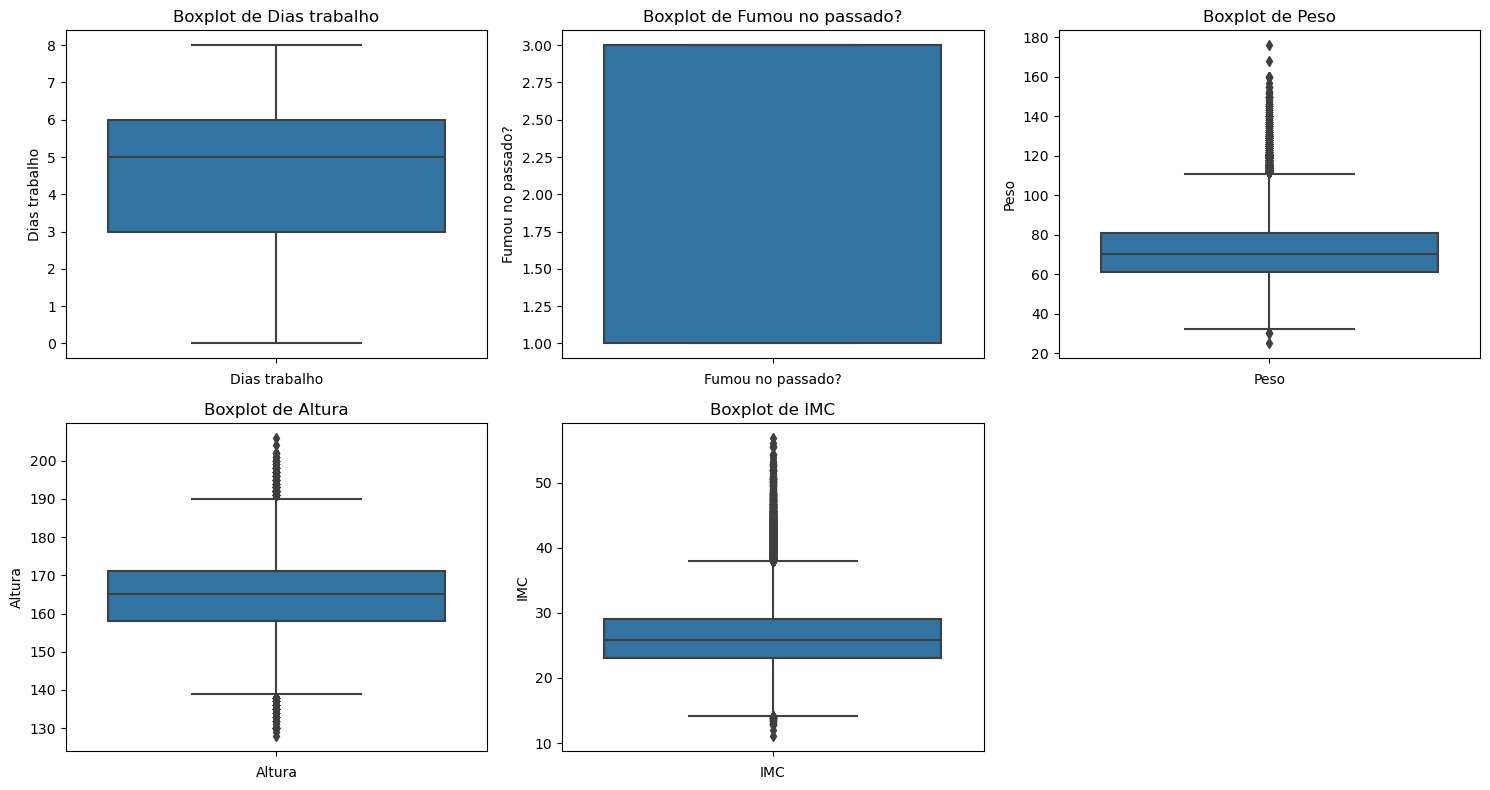

In [21]:
# Listar colunas numéricas que têm NaN
colunas_com_nan = ['Dias trabalho', 'Fumou no passado?', 'Peso', 'Altura', 'IMC']
# A mediana é uma boa escolha em caso de outliers.

# Criar boxplots para colunas numéricas com NaN
n_colunas = len(colunas_com_nan)
n_linhas = (n_colunas // 3) + (n_colunas % 3 > 0)

plt.figure(figsize=(15, n_linhas * 4))
for i, coluna in enumerate(colunas_com_nan):
    plt.subplot(n_linhas, 3, i + 1)
    sns.boxplot(y=df_Aptos[coluna])
    plt.title(f'Boxplot de {coluna}')
    plt.xlabel(coluna)

plt.tight_layout()
plt.show()

Conclusão para essas colunas:

*   '*Dias de Trabalho*' -  Tanto a média quanto a mediana são boas opções para substituir os valores NaN.
*   '*Fumou no Passado*' - Substituir os NaN pelo valor mais frequente (moda)
* '*Peso*', '*Altura*' e '*IMC*' - Substituir os NaN pela Mediana


In [22]:
# Substituindo NaNs na coluna 'Dias Trabalho' pela média
dias_trabalho_mean = df_Aptos['Dias trabalho'].mean()
df_Aptos['Dias trabalho'] = df_Aptos['Dias trabalho'].fillna(dias_trabalho_mean)

# Substituindo NaNs na coluna 'Fumou no Passado' pela moda
fumou_no_passado_mode = df_Aptos['Fumou no passado?'].mode()[0]
df_Aptos['Fumou no passado?'] = df_Aptos['Fumou no passado?'].fillna(fumou_no_passado_mode)

# Substituindo NaNs nas colunas 'Peso', 'Altura' e 'IMC' pela mediana
for column in ['Peso', 'Altura', 'IMC']:
    mediana = df_Aptos[column].median()
    df_Aptos[column] = df_Aptos[column].fillna(mediana)

# Exibindo os valores NaN após a substituição
print("\nValores NaN após a substituição:")
print(df_Aptos.isnull().sum())


Valores NaN após a substituição:
Sexo                                 0
Idade                                0
Situação cens.                       0
Dias trabalho                        0
Aval. Saúde                          0
Bem estar                            0
Frequência Problemas Sono            0
Frequência Indisposição              0
Frequência falta de prazer           0
Frequência falta concentração        0
Frequência problemas alimentação     0
Frequência Lentidão ou Agitação      0
Frequência sem perspectiva           0
Frequência sentimento de fracasso    0
Frequência ideação suicida           0
Frequencia bebida alcoolica          0
Pratica exercícios físicos?          0
Horas de tela                        0
Fuma Tabaco atualmente?              0
Fumou no passado?                    0
Diagnóstico depressão                0
Peso                                 0
Altura                               0
IMC                                  0
dtype: int64


In [23]:
# Exportar o df_filtrado para um arquivo CSV
df_Aptos.to_csv("data.csv", index=False)